In [ ]:
# Pradėta 2024-11-21_ObjectProperties.ipynb

import pandas as pd
import time
import sqlite3
import random
import sys
import os

from bs4 import BeautifulSoup

# Selenium
import selenium
from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium import webdriver

sys.path.append(os.path.abspath(".."))
from my_lib.properties_of_17 import properties_of
# from my_lib.my_db_functions import df_to_sqlite

In [101]:
# Nustatymai, parametrai:

item_type = 'televizoriai'
# 'dronai', 'televizoriai', 'saldytuvai', 'televizoriai', 'mobilieji-telefonai'
item_params = 'f.s-gamintojas=Samsung&sort=-price&'

item_title = 'TV'
item_producer = 'Samsung'

common_prop = {'producer':'samsung','5g':True} # Common properties

url = f'https://www.varle.lt/{item_type}/?{item_params}'
print(url)

https://www.varle.lt/televizoriai/?f.s-gamintojas=Samsung&sort=-price&


In [ ]:
varlė_tv=properties_of('varlė_tv',engine='pandas')

In [ ]:
# --- Trinu. Nereikalingas. Viską išsaugosiu per 'properties_of'.

# Šis fragmentas automatiškai išvalo 'items_df' sukauptus duomenis,
# Pasirengta naujų duomenų įrašymui.

# items_df = pd.DataFrame(columns=('id','price','url','price_in_cents','producer','5g'))
# # čia bus šios programos rezultatas

# items_df

In [ ]:
# SCRAP

# Atidaro Chrome naršyklę,
# reikia patvirtinti "Leisti visus slapukus"!
# Šis fragmentas automatiškai panaikina „draiver“.

opcijos = Options()
opcijos.add_argument('--incognito')
opcijos.add_argument('--ignore-certificate-errors')
opcijos.add_argument('--ignore-ssl-errors')
driver = webdriver.Chrome(options=opcijos)

driver.get(url)
# time.sleep(3)
source = driver.page_source
print(f'First page: {url}')

bs = BeautifulSoup(source,'html.parser')
pages_numbers = bs.find('div',{'class':'PAGINATION'}).find_all('li',{'class':'number'})
total_pages = int(pages_numbers[-1].text.strip())
print(f'Total pages: {total_pages}')

First page: https://www.varle.lt/televizoriai/?f.s-gamintojas=Samsung&sort=-price&
Total pages: 5


In [ ]:
###############################################################################

In [ ]:
# SCRAP

# Toliau analizuojamas prekių sąrašo html iš bs=BeautifulSoup().

grid_items = bs.find_all('div',{'class':'GRID_ITEM'})
for grid_item in grid_items:

    item_href = grid_item.find('div',{'class':'product-title'}).find('a')['href']
    item_url = 'https://www.varle.lt'+ item_href
    item_id = item_href.split('-')[-1].split('.')[0]
    id = int(item_id)

    price_container = grid_item.find('div',{'class':'price-container'})
    product_info = grid_item.find('div',{'class':'product-info'})

    price_value = price_container.find('span',{'class':'price-value'}).getText()
    item_price = ''.join(price_value.split())

    # Find all <li> elements
    all_li = grid_item.find_all('li')

    # Initialize variables for results
    screen_size = None
    resolution = None

    # Iterate through <li> elements and check their text content
    for li in all_li:
        if "Ekrano įstrižainė" in li.text:
            screen_size = li.find('span').text
        elif "Ekrano raiška" in li.text:
            resolution = li.find('span').text

    print(f"Ekrano įstrižainė: {screen_size}, raiška: {resolution}.")

    varlė_tv.add_property( id, 'url', item_url )
    varlė_tv.add_property( id, 'price', item_price )
    varlė_tv.add_property( id, 'screen_size', screen_size )
    varlė_tv.add_property( id, 'resolution', resolution )


# print(f'DF items: {len(items_df)}.')

Ekrano įstrižainė: 85
Ekrano raiška: 8K Ultra HD
Ekrano įstrižainė: 98
Ekrano raiška: 4K
Ekrano įstrižainė: 85
Ekrano raiška: 4K
Ekrano įstrižainė: 65
Ekrano raiška: 4K
Ekrano įstrižainė: 77
Ekrano raiška: 4K
Ekrano įstrižainė: 85
Ekrano raiška: 4K
Ekrano įstrižainė: 65
Ekrano raiška: 4K
Ekrano įstrižainė: 83
Ekrano raiška: 4K
Ekrano įstrižainė: 75
Ekrano raiška: 4K
Ekrano įstrižainė: 55
Ekrano raiška: 8K Ultra HD
Ekrano įstrižainė: 75
Ekrano raiška: None
Ekrano įstrižainė: 77
Ekrano raiška: 4K
Ekrano įstrižainė: 75
Ekrano raiška: 4K
Ekrano įstrižainė: 85
Ekrano raiška: 4K
Ekrano įstrižainė: 85
Ekrano raiška: 3840 x 2160
Ekrano įstrižainė: 75
Ekrano raiška: 4K
Ekrano įstrižainė: None
Ekrano raiška: 4K
Ekrano įstrižainė: 85
Ekrano raiška: 4K
Ekrano įstrižainė: 65
Ekrano raiška: None
Ekrano įstrižainė: 85
Ekrano raiška: 4K
Ekrano įstrižainė: 98
Ekrano raiška: 4K
Ekrano įstrižainė: 77
Ekrano raiška: 4K
Ekrano įstrižainė: 75
Ekrano raiška: 4K
Ekrano įstrižainė: 65
Ekrano raiška: 4K
Ekrano 

In [ ]:
# item_block
# price_container
# product_info

df_df_=varlė_tv.get_wide_df()
print(df_df_.head(3))
print(len(df_df_))

property_id        id     price   resolution screen_size  \
0            19494903  2075.99€           4K          75   
1            21816999  1688.90€           4K          85   
2            21817143  3128.97€  8K Ultra HD          55   

property_id                                                url  
0            https://www.varle.lt/televizoriai/samsung-75-c...  
1            https://www.varle.lt/televizoriai/televizorius...  
2            https://www.varle.lt/televizoriai/televizorius...  
38


In [ ]:
# def str_str(m):
#     if len(m) == 0:
#         return ""
#     elif len(m) == 1:
#         return m[0].lower()
#     else:
#         return f"{m[0]}_{m[1]}".lower()

# li_params = ['gamintojas','ekrano_įstrižainė','vidinė_atmintis','atmintis_(ram)','2_sim']
# for listitem in item_block.find('div',{'class':'spec-shortcuts'}).find_all('li'):
#     print(listitem)
#     li_contents=listitem.contents[0].split()
#     print(str_str(li_contents))
#     print(listitem.find('span').text)
#     print()

In [ ]:
# SCRAP

# Perskaitomi kiti prekių sąrašo puslapiai,
# po to įrašoma į db

import random

# for page_number in range(2,total_pages+1):
for page_number in range(2,total_pages+1):

    url = f'https://www.varle.lt/{item_type}/?{item_params}p={page_number}'
    driver.get(url)
    time.sleep(random.randint(25,35))
    source = driver.page_source
    print(f'Prskaityta {url}')

    bs = BeautifulSoup(source,'html.parser')

    grid_items = bs.find_all('div',{'class':'GRID_ITEM'})
    for grid_item in grid_items:

        item_href = grid_item.find('div',{'class':'product-title'}).find('a')['href']
        item_url = 'https://www.varle.lt'+ item_href
        item_id = item_href.split('-')[-1].split('.')[0]
        id = int(item_id)

        price_container = grid_item.find('div',{'class':'price-container'})
        product_info = grid_item.find('div',{'class':'product-info'})

        price_value = price_container.find('span',{'class':'price-value'}).getText()
        item_price = ''.join(price_value.split())

        # Find all <li> elements
        all_li = grid_item.find_all('li')

        # Initialize variables for results
        screen_size = None
        resolution = None

        # Iterate through <li> elements and check their text content
        for li in all_li:
            if "Ekrano įstrižainė" in li.text:
                screen_size = li.find('span').text
            elif "Ekrano raiška" in li.text:
                resolution = li.find('span').text

        # print(f"Ekrano įstrižainė: {screen_size}, raiška: {resolution}.")

        varlė_tv.add_property( id, 'url', item_url )
        varlė_tv.add_property( id, 'price', item_price )
        varlė_tv.add_property( id, 'screen_size', screen_size )
        varlė_tv.add_property( id, 'resolution', resolution )

    # items_df.drop_duplicates(subset='id',keep='last',inplace=True)
    # print(f'Get {items_total} items. Unique {len(items_df)} items.')

# driver.close() # Uždaro Chrome puslapį.

Prskaityta https://www.varle.lt/televizoriai/?f.s-gamintojas=Samsung&sort=-price&p=2
Ekrano įstrižainė: None
Ekrano raiška: None
Ekrano įstrižainė: 75
Ekrano raiška: 4K
Ekrano įstrižainė: 55
Ekrano raiška: 3840 x 2160
Ekrano įstrižainė: 65
Ekrano raiška: 3840 x 2160
Ekrano įstrižainė: 65
Ekrano raiška: 4K
Ekrano įstrižainė: 75
Ekrano raiška: 4K
Ekrano įstrižainė: 75
Ekrano raiška: 4K
Ekrano įstrižainė: 65
Ekrano raiška: 4K
Ekrano įstrižainė: None
Ekrano raiška: None
Ekrano įstrižainė: 65
Ekrano raiška: 4K
Ekrano įstrižainė: 55
Ekrano raiška: 4K
Ekrano įstrižainė: 75
Ekrano raiška: 3840 x 2160
Ekrano įstrižainė: 85
Ekrano raiška: 4K
Ekrano įstrižainė: None
Ekrano raiška: None
Ekrano įstrižainė: 75
Ekrano raiška: 4K
Ekrano įstrižainė: 65
Ekrano raiška: 4K
Ekrano įstrižainė: 75
Ekrano raiška: 3840 x 2160
Ekrano įstrižainė: 48
Ekrano raiška: 4K
Ekrano įstrižainė: 65
Ekrano raiška: 4K
Ekrano įstrižainė: 65
Ekrano raiška: 4K
Ekrano įstrižainė: 85
Ekrano raiška: 4K
Ekrano įstrižainė: None
Ekr

In [ ]:
df_df_=varlė_tv.get_wide_df()
print(df_df_.head(3))
print(len(df_df_))

property_id        id    price resolution screen_size  \
0            15346087  189.99€   HD Ready          32   
1            15704379  580.09€         4K          43   
2            16123625   80.99€       None        None   

property_id                                                url  
0            https://www.varle.lt/televizoriai/televizorius...  
1            https://www.varle.lt/televizoriai/televizorius...  
2            https://www.varle.lt/televizoriai/televizorius...  
162


In [ ]:
print(varlė_tv.property.columns)
print(len(varlė_tv.property))

Index(['id', 'property_id', 'value'], dtype='object')
648


In [ ]:
df_price=varlė_tv.get_wide_df(['price'])
print(df_price.head(3))
print(len(df_price))

property_id        id    price
0            15346087  189.99€
1            15704379  580.09€
2            16123625   80.99€
162


In [ ]:
varlė_tv.write_wide('varlė_tv','csv')
varlė_tv.write_narrow('varlė_tv','csv')

Plačios lentelės duomenys išsaugoti į varlė_tv per 0.09s.
Siauros lentelės duomenys išsaugoti į varlė_tv per 0.01s.


In [ ]:
varlė_tv.write_wide('varlė_tv','parquet')
varlė_tv.write_narrow('varlė_tv','parquet') # neveikia?

Plačios lentelės duomenys išsaugoti į varlė_tv per 0.05s.
Siauros lentelės duomenys išsaugoti į varlė_tv per 0.01s.


In [ ]:
varlė_tv.write_wide('varlė_tv','feather')
varlė_tv.write_narrow('varlė_tv','feather') # neveikia?

In [ ]:
# Pridedami stulpeliai kaina centais (int) ir gamintojas

import re

def price_in_cents(price:str) -> int:
    # Pašalina visus simbolius, išskyrus skaičius, kablelį ir tašką:
    cleaned = re.sub(r'[^\d.,]', '', price).replace(',', '.').replace(' ', '')
    return int(float(cleaned)*100)

for x in varlė_tv.get_wide_df(['price']).values: # 'price','price_in_cents','producer'
    print(x[0],x[1])
    varlė_tv.add_property( x[0], 'price_in_cents', price_in_cents(x[1]) )
    varlė_tv.add_property( x[0], 'producer', 'samsung' )

#     varlė_tv.add_property( id, 'resolution', resolution )
#     varlė_tv.add_property( id, 'resolution', resolution )

# varlė_tv.property['price_in_cents'] = varlė_tv.property['price'].apply(price_in_cents)
# varlė_tv.property['producer'] = 'samsung'


15346087 189.99€
15704379 580.09€
16123625 80.99€
18690054 285.99€
19494903 2075.99€
20749926 544.90€
21816999 1688.90€
21817143 3128.97€
22413273 615.99€
22926666 503.36€
23626651 233.86€
23626657 329€
23897524 1450.41€
24007157 1312.76€
24008716 1491.38€
24104671 371.90€
24108999 519.99€
24401447 929.99€
24436017 739.99€
24493754 2280.91€
24503646 3318.72€
24598044 1315.99€
24704524 989€
24745111 1879.03€
24745113 2529.99€
25604702 379.99€
25695736 1195.99€
25808190 3682.66€
25808284 1393.77€
25809141 391.07€
25824667 498.42€
25853525 355.99€
25999902 469.99€
26610765 815.99€
26617700 469.99€
26627327 2653.30€
26627332 4259.98€
26968342 4398€
27633612 1635.99€
27766931 3209.99€
31817992 395.41€
32610773 1855.99€
32726938 721.96€
32747699 622.69€
32923692 1251.16€
32923906 829.31€
32923907 1745.48€
32923908 611.81€
32923909 1357.62€
32923911 786.94€
32923912 819.99€
32923914 1021.92€
32924762 297.73€
32924764 328.64€
33212411 1194€
33212418 1125.99€
33548171 1664.88€
33548172 298€
335

In [ ]:
varlė_tv.get_wide_df(['price','price_in_cents','producer']).head(5)

property_id,id,price,price_in_cents,producer
0,15346087,189.99€,18999,samsung
1,15704379,580.09€,58009,samsung
2,16123625,80.99€,8098,samsung
3,18690054,285.99€,28599,samsung
4,19494903,2075.99€,207598,samsung


In [ ]:
print(varlė_tv.property.columns)
print(len(varlė_tv.property))

Index(['id', 'property_id', 'value'], dtype='object')
972


In [ ]:
wide_df=varlė_tv.get_wide_df() # 'price','price_in_cents','producer'
print(wide_df.head(3))
print(len(wide_df))
print(wide_df.columns)

property_id        id    price price_in_cents producer resolution screen_size  \
0            15346087  189.99€          18999  samsung   HD Ready          32   
1            15704379  580.09€          58009  samsung         4K          43   
2            16123625   80.99€           8098  samsung       None        None   

property_id                                                url  
0            https://www.varle.lt/televizoriai/televizorius...  
1            https://www.varle.lt/televizoriai/televizorius...  
2            https://www.varle.lt/televizoriai/televizorius...  
162
Index(['id', 'price', 'price_in_cents', 'producer', 'resolution',
       'screen_size', 'url'],
      dtype='object', name='property_id')


In [ ]:
from my_lib.my_db_functions import df_to_sqlite

print('Save DF to SQLite3. Plati lentelė.')
df_to_sqlite(wide_df,"./my_scrap_working_data.db",table_name='varlė_tv')


Save DF to SQLite3. Plati lentelė, ne properties_of()
Lentelė 'varlė_tv' sėkmingai įrašyta į DB.


In [ ]:
print(len(varlė_tv.property))
print(varlė_tv.property.head(10))

972
         id  property_id                                              value
0  38353067          url  https://www.varle.lt/televizoriai/televizorius...
1  38353067        price                                           5687.06€
2  38353067  screen_size                                                 85
3  38353067   resolution                                        8K Ultra HD
4  26968342          url  https://www.varle.lt/televizoriai/televizorius...
5  26968342        price                                              4398€
6  26968342  screen_size                                                 98
7  26968342   resolution                                                 4K
8  26627332          url  https://www.varle.lt/televizoriai/televizorius...
9  26627332        price                                           4259.98€


In [ ]:
print('Save DF to SQLite3. Siaura lentelė: varlė_tv.property')
df_to_sqlite(varlė_tv.property,"./my_scrap_working_data.db",table_name='properties_of_varlė_tv')

Save DF to SQLite3. Siaura lentelė: varlė_tv.property
Lentelė 'properties_of_varlė_tv' sėkmingai įrašyta į DB.


In [ ]:
wide_df

property_id,id,price,price_in_cents,producer,resolution,screen_size,url
0,15346087,189.99€,18999,samsung,HD Ready,32,https://www.varle.lt/televizoriai/televizorius...
1,15704379,580.09€,58009,samsung,4K,43,https://www.varle.lt/televizoriai/televizorius...
2,16123625,80.99€,8098,samsung,None,None,https://www.varle.lt/televizoriai/televizorius...
3,18690054,285.99€,28599,samsung,Full HD,32,https://www.varle.lt/televizoriai/televizorius...
4,19494903,2075.99€,207598,samsung,4K,75,https://www.varle.lt/televizoriai/samsung-75-c...
...,...,...,...,...,...,...,...
157,41313975,1649.99€,164999,samsung,None,None,https://www.varle.lt/televizoriai/televizorius...
158,41461447,505.99€,50599,samsung,None,None,https://www.varle.lt/televizoriai/televizorius...
159,41472880,1869.99€,186999,samsung,None,None,https://www.varle.lt/televizoriai/televizorius...
160,41472881,1345.99€,134599,samsung,None,None,https://www.varle.lt/televizoriai/televizorius...


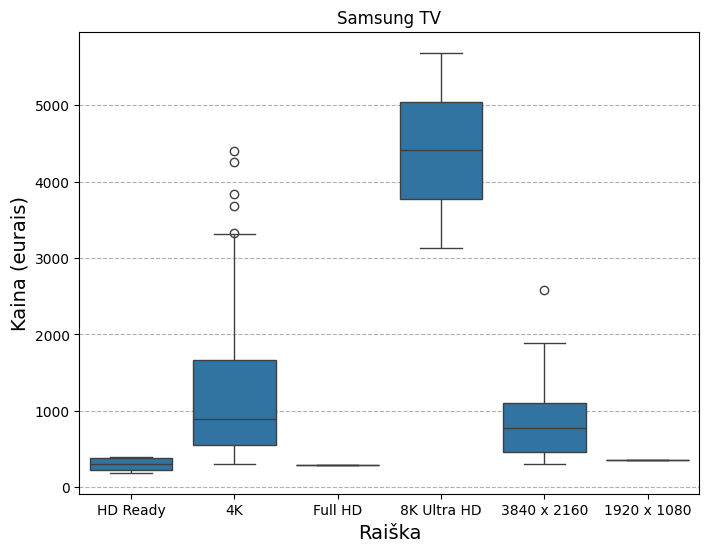

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tv_df = wide_df

# Konvertuojame kainą į eurus
tv_df['price_in_euros'] = tv_df['price_in_cents']/100

# 1. Kainos priklausomybė nuo raiškos su interpoliacija
def plot_price_vs_resolution(dataframe):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='resolution', y='price_in_euros', data=dataframe)
    # sns.stripplot(x='resolution', y='price_in_euros', data=dataframe, color='blue', alpha=0.7, jitter=True)
    plt.title(f"{item_producer} {item_title}")
    plt.xlabel('Raiška',fontsize=14)
    plt.ylabel('Kaina (eurais)',fontsize=14)
    plt.grid(axis='y', linestyle='--')
    plt.show()

plot_price_vs_resolution(tv_df)


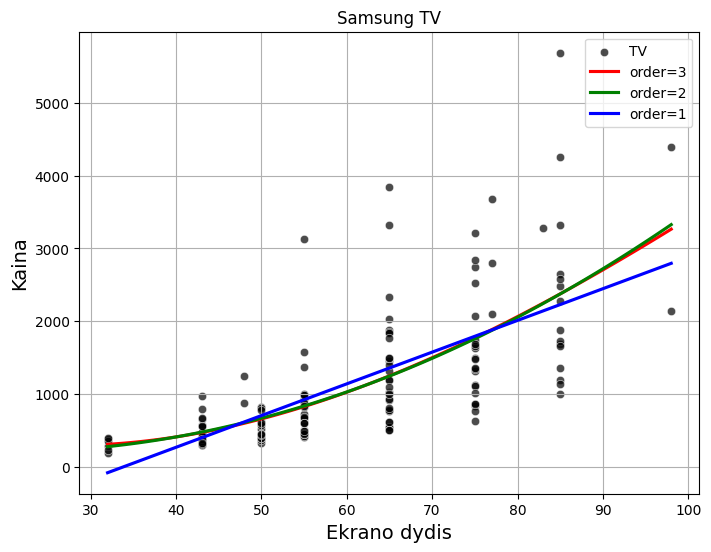

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sukuriame pavyzdinį DataFrame su televizorių duomenimis
data = wide_df

tv_df = pd.DataFrame(data)

# 1. Vienas grafikas: ekrano dydis (x) vs kaina (y, eurais) su interpoliacija
def plot_screen_size_vs_price(dataframe):
    def to_int(value):
        if isinstance(value, str):
            return int(value)
        return value

    dataframe['screen_size'] = dataframe['screen_size'].apply(to_int)
    dataframe['price_in_cents'] = dataframe['price_in_cents'].apply(to_int)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataframe['screen_size'], y=dataframe['price_in_cents']/100, color='black', alpha=0.7, label='TV')
    sns.regplot(x=dataframe['screen_size'], y=dataframe['price_in_cents']/100, order=3, scatter=False, color='red', ci=None, label='order=3')
    sns.regplot(x=dataframe['screen_size'], y=dataframe['price_in_cents']/100, order=2, scatter=False, color='green', ci=None, label='order=2')
    sns.regplot(x=dataframe['screen_size'], y=dataframe['price_in_cents']/100, order=1, scatter=False, color='blue', ci=None, label='order=1')
    plt.title(f"{item_producer} {item_title}")
    plt.xlabel('Ekrano dydis',fontsize=14)
    plt.ylabel('Kaina',fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Paleidžiame grafiką
if __name__ == "__main__":
    plot_screen_size_vs_price(tv_df)
